## Откройте файл с данными и изучите общую информацию. 

In [1]:
# Загрузим данные из файла в датафрейм "data"

import pandas as pd 
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
# Изучим общую информацию о полученном датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

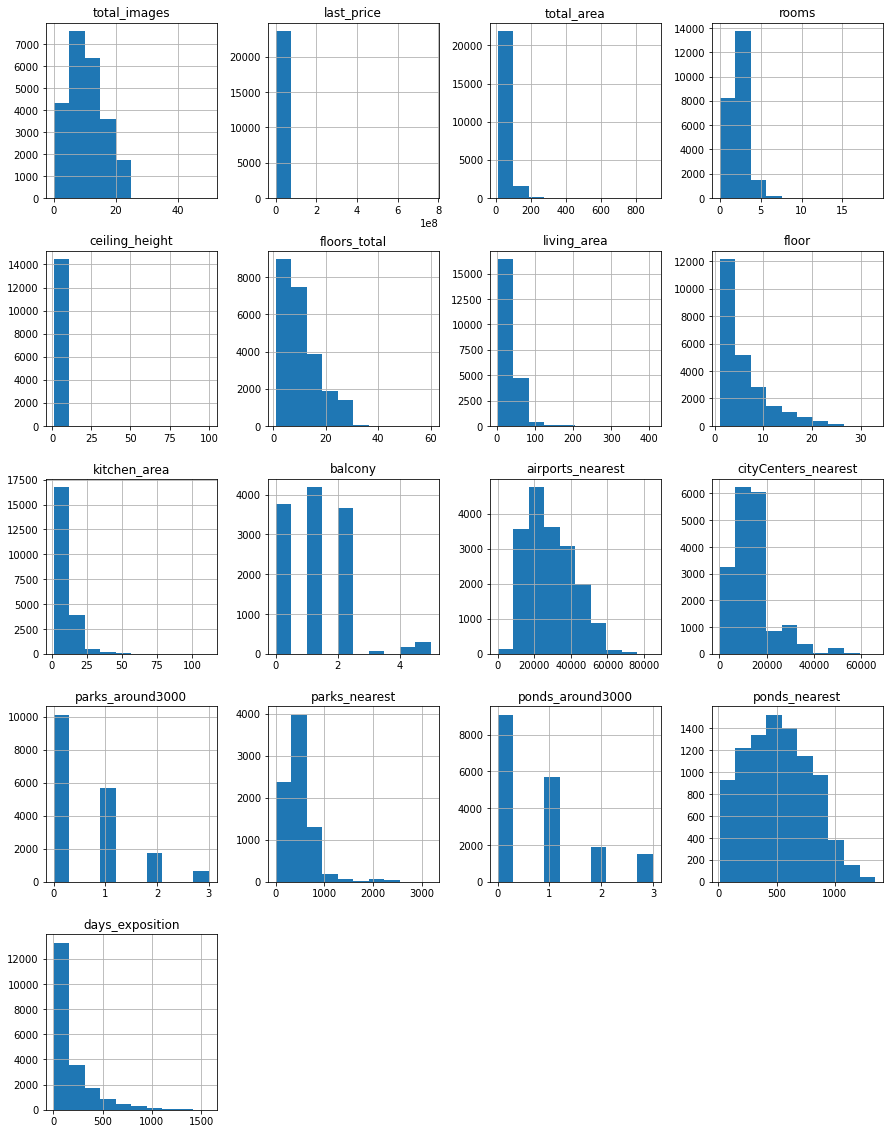

In [3]:
# Построим общую гистограмму для всех числовых столбцов таблицы

data.hist(figsize=(15, 20));

## Предобработка данных

In [4]:
# Определим в каких столбцах есть пропуски

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
# Заполним пропущенные значения там, где это возможно. 

data['floors_total'] = data['floors_total'].fillna(value=0)
data['balcony'] = data['balcony'].fillna(value=0)
data['airports_nearest'] = data['airports_nearest'].fillna(value=0)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)

# Определим соотношение медианной общей площади к медианной жилой. 
# А затем, заполним пропуски в столбце living_area отношением общей площади к найденному соотношению.

data['living_area'] = data['living_area'].fillna(value = ( data['total_area'] / ((data['total_area'].median() / data['living_area'].median())))) 

# Аналогично заполним пропуски в столбце kitchen_area

data['kitchen_area'] = data['kitchen_area'].fillna(value = ( data['total_area'] / ((data['total_area'].median() / data['kitchen_area'].median())))) 

<b> Причины, которые могли привести к пропускам в данных.<br> </b>
    В столбцах "ceiling_height", "floors_total" данные могут отсутствовать в виду не знания планировки квартиры, а также этажность дома.<br>
    Пропуски в столбцах "living_area", "kitchen_area" могут возникнуть из-за того, что некоторые квартиры имеют совмещенные кухни и комнаты, и квартира не является студией, и возникают трудности, как правильно это отобразить. Также прописку могут возникнуть при заполнении информации для квартир-студкей.<br>
    Пропуск в стобце "balcony" может возникнуть в случае, если балконов нет.<br>
    В столбах "airports_nearest", "cityCenters_nearest", "parks_nearest", "ponds_nearest" в виду невозможности автоматически точно определить расстояния до аэропротов, центра города, парков и прудов. Аналогично пропуски в стобцах "parks_around3000", "ponds_around3000" возникают по причине невозможности автоматически точно определить расстояния до парков и прудов в указанных дистанциях. <br>


In [6]:
# Проверим отсутствие пропусков в заполненных столбцах.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest            0
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# Найдем столбцы, в которых нужно изменить тип данных.

data['floors_total'] = data['floors_total'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int')
data['airports_nearest'] = data['airports_nearest'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

<b> Причины изменения типов данных.<br> </b>
    В столбцах, где изменение произошло на тип "int64", причиной является подбор логического типа данных, так как значения в данных столбцах не могут иметь значения "float64". Также скорретировали тип данных столбцов "is_apartment" и "first_day_exposition" на подходящий.


In [8]:
# Проверим изменение типа данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [9]:
# Изучим уникальные значения в столбце с названиями.

data['locality_name'].sort_values().unique() 

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [10]:
data['locality_name'].sort_values().unique() 

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [11]:
# Устраним неявные дубликаты в столбце с названиями.

data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','городской поселок')
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа','городской поселок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок','городской поселок')

In [12]:
# Проверим устранение неявных дубликатов в столбце с названиями.

data['locality_name'].sort_values().unique() 

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Важины', 'городской поселок Виллози',
       'городской поселок Вознесенье', 'городской поселок Вырица',
       'городской поселок Дружная Горка', 'городской поселок Дубровка',
       'городской поселок Ефимовский', 'городской поселок Кондратьево',
       'городской поселок Красный Бор', 'городс

In [13]:
# Найдем редкие и выбивающиеся значения.
# Рассмотрим столбец "ceiling_height" с данными о высоте потолков.

data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [14]:
# Преобразуем аномально большие потолки, все значение выше 20 м разделим на 10 

data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height']/10

In [15]:
# Проверим преобразование столбца "ceiling_height".

data['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,
        2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,
        3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,
        3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,
        3.65,  3.66,

<b> Особенности в данных.<br> </b>
    В данных я обнаружил, что в столбце "locality_name" есть разные повторения одного и того же названия (например, "поселок городского типа", "городской поселок", "городской посёлок"). Данные повторы были устранениы. Также обнаружил аномально большие значения в стоблце "ceiling_height", причиной которого является неточная запись числа (число не записывается как десятичная дробь).

## Посчитайте и добавьте в таблицу новые столбцы

In [16]:
# Добавим столбец с ценой одного квадратного метра.

data['price_for_sq'] = (data['last_price'] / data['living_area'])
data['price_for_sq'] = data['price_for_sq'].fillna(value=0).round().astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,0,Санкт-Петербург,18863,16028.0,1,482.0,2,755.0,NaN,254902
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,True,...,2,посёлок Шушары,12817,18603.0,0,NaN,0,NaN,81.0,180108
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,True,...,0,Санкт-Петербург,21741,13933.0,1,90.0,2,574.0,558.0,151487
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,91.730769,9,True,...,0,Санкт-Петербург,28098,6800.0,2,84.0,3,234.0,424.0,707505
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,0,Санкт-Петербург,31856,8098.0,2,112.0,1,48.0,121.0,312500


In [17]:
# Добавим столбец с днем недели публикации объявления.

data['day_exposition'] = data['first_day_exposition'].dt.weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq,day_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,Санкт-Петербург,18863,16028.0,1,482.0,2,755.0,NaN,254902,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,True,...,посёлок Шушары,12817,18603.0,0,NaN,0,NaN,81.0,180108,1
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,True,...,Санкт-Петербург,21741,13933.0,1,90.0,2,574.0,558.0,151487,3
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,91.730769,9,True,...,Санкт-Петербург,28098,6800.0,2,84.0,3,234.0,424.0,707505,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,Санкт-Петербург,31856,8098.0,2,112.0,1,48.0,121.0,312500,1


In [18]:
# Добавим столбец с месяцем публикации объявления.

data['month_exposition'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq,day_exposition,month_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,18863,16028.0,1,482.0,2,755.0,NaN,254902,3,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,True,...,12817,18603.0,0,NaN,0,NaN,81.0,180108,1,12
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,True,...,21741,13933.0,1,90.0,2,574.0,558.0,151487,3,8
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,91.730769,9,True,...,28098,6800.0,2,84.0,3,234.0,424.0,707505,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,31856,8098.0,2,112.0,1,48.0,121.0,312500,1,6


In [19]:
# Добавим столбец с годом публикации объявления.

data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq,day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,16028.0,1,482.0,2,755.0,NaN,254902,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,True,...,18603.0,0,NaN,0,NaN,81.0,180108,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,True,...,13933.0,1,90.0,2,574.0,558.0,151487,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,91.730769,9,True,...,6800.0,2,84.0,3,234.0,424.0,707505,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,8098.0,2,112.0,1,48.0,121.0,312500,1,6,2018


In [20]:
# Добавим столбец с типом этажа квартиры (значения — «первый», «последний», «другой»).

def type_appartment(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor']== 1:
        return 'первый'
    else:
        return 'другой'
data['type_appartment'] = data.apply(type_appartment, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq,day_exposition,month_exposition,year_exposition,type_appartment
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,1,482.0,2,755.0,NaN,254902,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,True,...,0,NaN,0,NaN,81.0,180108,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,True,...,1,90.0,2,574.0,558.0,151487,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,91.730769,9,True,...,2,84.0,3,234.0,424.0,707505,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,2,112.0,1,48.0,121.0,312500,1,6,2018,другой


In [21]:
# Создадим столбец с расстоянием до центра города в километрах.

data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).fillna(value=0).round().astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq,day_exposition,month_exposition,year_exposition,type_appartment,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,482.0,2,755.0,NaN,254902,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,True,...,NaN,0,NaN,81.0,180108,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,True,...,90.0,2,574.0,558.0,151487,3,8,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,91.730769,9,True,...,84.0,3,234.0,424.0,707505,4,7,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,112.0,1,48.0,121.0,312500,1,6,2018,другой,8


## Проведите исследовательский анализ данных

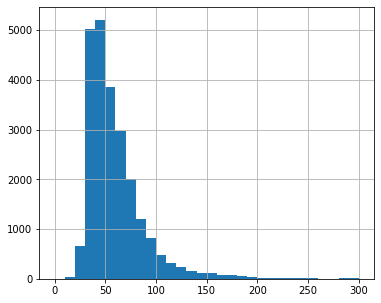

In [22]:
# Изучим следующие параметры объектов.
# Общая площадь объектов.

data['total_area'].hist(bins=30, range=(0, 300), figsize=(6,5));

AxesSubplot(0.125,0.125;0.775x0.755)


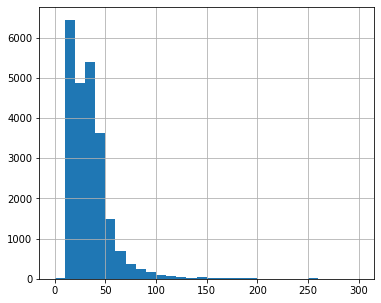

In [23]:
# Жилая площадь объектов.

print(data['living_area'].hist(bins=30, range=(0,300), figsize=(6,5)));

AxesSubplot(0.125,0.125;0.775x0.755)


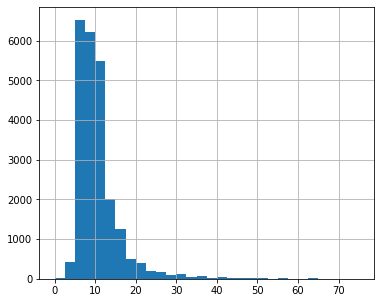

In [24]:
# Площади кухни.

print(data['kitchen_area'].hist(bins=30, range=(0,75), figsize=(6,5)));

AxesSubplot(0.125,0.125;0.775x0.755)


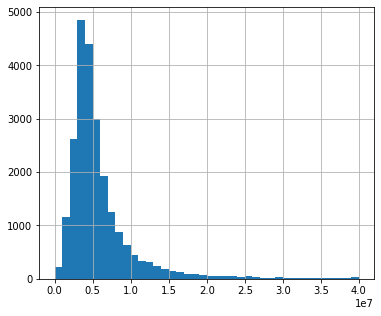

In [25]:
# Цены.

print(data['last_price'].hist(bins=40, range=(0, 4e7), figsize=(6,5)));

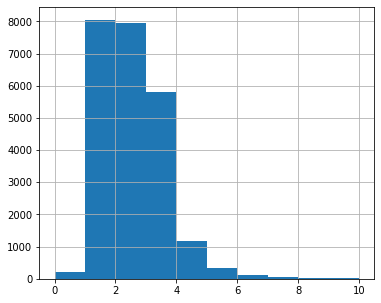

In [26]:
# Количество комнат.

data['rooms'].hist(bins=10, range=(0, 10), figsize=(6,5));

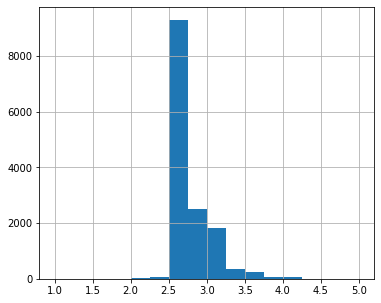

In [27]:
# Высота потолков.

data['ceiling_height'].hist(bins=16, range=(1, 5), figsize=(6,5));

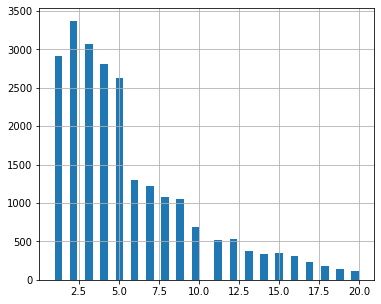

In [28]:
# Этаж квартиры.

data['floor'].hist(bins=40, range=(1, 20), figsize=(6,5));

Изучим, как быстро продавались квартиры (столбец "days_exposition"). Этот параметр показывает, сколько дней было размещено каждое объявление.

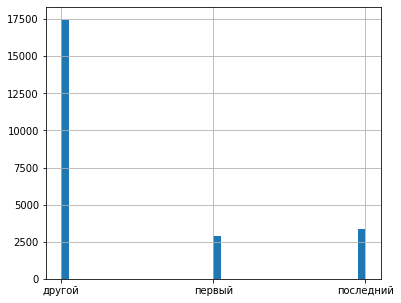

In [29]:
# Тип этажа квартиры.

data['type_appartment'].hist(bins=40, range=(0, 2), figsize=(6,5));

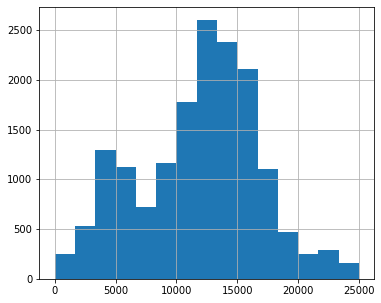

In [30]:
# Расстояние до центра города в метрах.

data['cityCenters_nearest'].hist(bins=15, range=(0, 25000), figsize=(6,5));

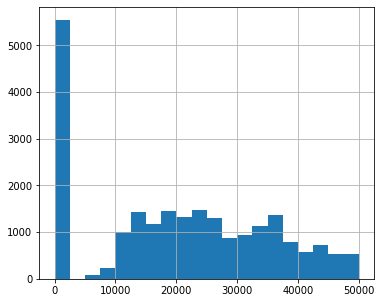

In [31]:
# Расстояние до ближайшего аэропорта.

data['airports_nearest'].hist(bins=20, range=(0, 50000), figsize=(6,5));

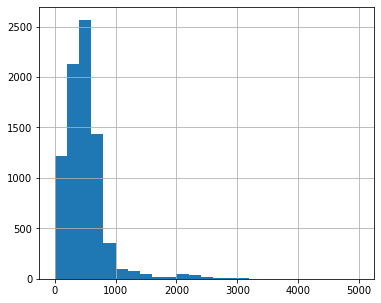

In [32]:
# Расстояние до ближайшего парка.

data['parks_nearest'].hist(bins=25, range=(0, 5000), figsize=(6,5));

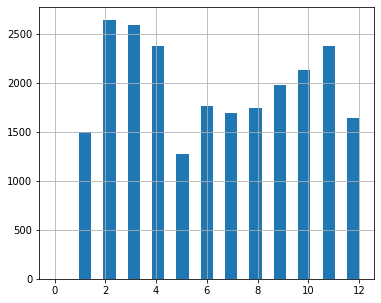

In [33]:
# Месяц публикации объявления.

data['month_exposition'].hist(bins=25, range=(0, 12), figsize=(6,5));

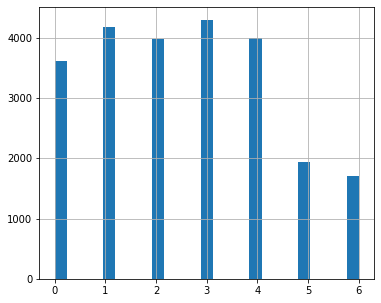

In [34]:
# День публикации объявления.

data['day_exposition'].hist(bins=25, range=(0, 6), figsize=(6,5));

<b> Опишите все ваши наблюдения по параметрам. <br> </b>
    Основное количетсво объявлений (около 14000) размещены с общей площадью 40-60 квадратных метров. Диаграмма скошена в право.<br>
    Большинство объявлений размещены с жилой площадью объектов от 10 до 50 квадратных метров.<br>
    Большинство объявлений размещены с площадью кухни от 5 до 12,5 квадратных метров.<br>
    Большинство объявлений размещены с стоимостью недвижимости от 3 до 7  миллионов рублей.<br>
    Большниство объектов недвижимости имеют высоту потолков от 2,5 до 3 метров.<br>
    Основное количество объектов недвижимости располагается на этажах от 1 до 5.<br>
    Основным типом квартир по этажу является «другой», что означает, что квартира расположены не на первом и посднем этаже.<br>
    Основное количество объектов недвижимости расположено в 10000 – 18000 метров от центра.<br>
    Объявления недвижимости, имеющие локацию «Санкт-Петербург» находятся не более чем 2,5 километра, остальные объекты более удалены.<br>
    Большинство объектов недвижимости, имеющие данные о парках,  расположены в пределах километра от ближайших прудов.<br>
    Больинтсво объявлений выставляются весной (февраль - апрель) или осенью (сентябрь - ноябрь).<br>
    Объявления в основном размещаются в будние дни.<br>

    

Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

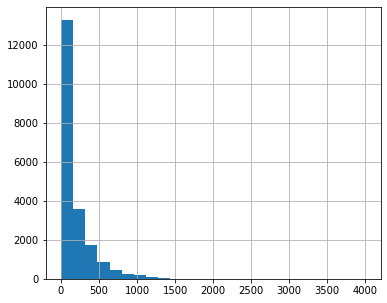

In [35]:
# Построим гисторграмму.

data['days_exposition'].hist(bins=25, range=(0, 4000), figsize=(6,5));

In [36]:
# Посчитаем среднюю и медиану.

print("Среднее значение дней для продажи квартир:", data['days_exposition'].mean())
print("Медийнное значение дней для продажи квартир:",data['days_exposition'].median())

Среднее значение дней для продажи квартир: 180.88863436982163
Медийнное значение дней для продажи квартир: 95.0


Обычно продажа занимает 95 дней. Быстрыми продажами можно считать объявления, размещенные до 100 дней. Необвчно долгими можно считать объявления от 300 дней и далее. 

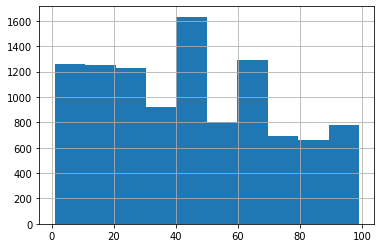

In [37]:
# Код ревьюера
filtered_df = data.query('days_exposition < 100')
filtered_df['days_exposition'].hist();

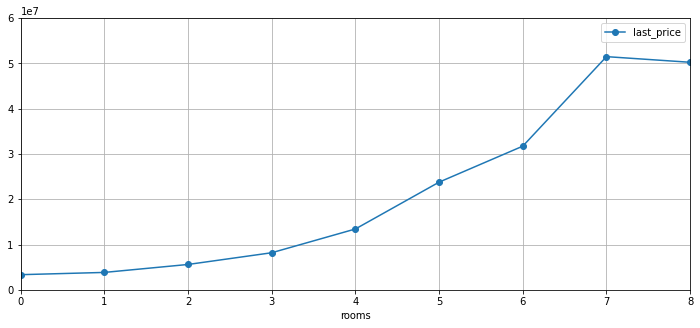

In [38]:
# Построим график зависимости цены от количества комнат

data.pivot_table(index="rooms", values="last_price").plot(
    style="o-", xlim=(0, 8), ylim=(0, 0.6e8), grid=True, figsize=(12, 5)
);

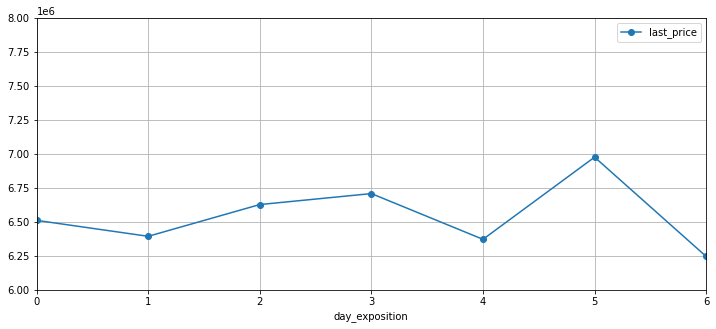

In [39]:
# Построим график зависимости цены от того сколько дней было размещено объявление.

data.pivot_table(index="day_exposition", values="last_price").plot(
    style="o-", xlim=(0, 6), ylim=(0.6e7, 0.8e7), grid=True, figsize=(12, 5)
);

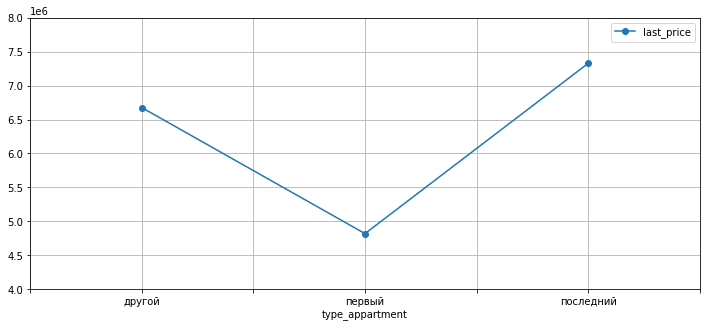

In [40]:
# Построим график зависимости цены от этажа.

data.pivot_table(index="type_appartment", values="last_price").plot(
    style="o-", xlim=(-0.5, 2.5), ylim=(0.4e7, 0.8e7), grid=True, figsize=(12, 5)
);

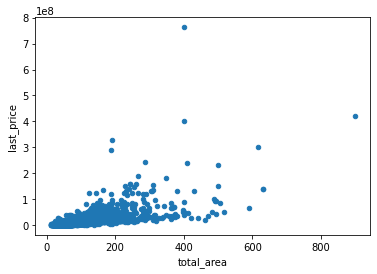

In [41]:
# Построим график зависимости стоимости от общей площади.

data.plot(x='total_area', y='last_price', kind='scatter');

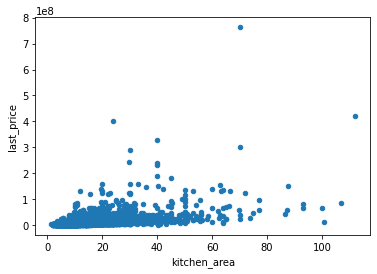

In [42]:
# Построим график зависимости стоимости от площади кухни.

data.plot(x='kitchen_area', y='last_price', kind='scatter'); 

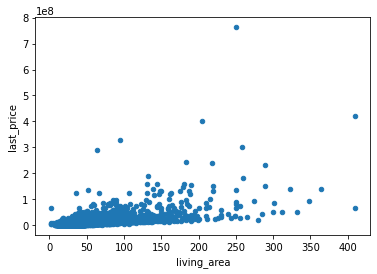

In [43]:
# Построим график зависимости стоимости от жилой площади.

data.plot(x='living_area', y='last_price', kind='scatter');

Большее влияние на стоимость квартир оказывают количество комнат, а также общая площадь.

In [44]:
# Определим 10 населенных пунктов с наибольшим числом объявлений.

top_10_locality_name = data['locality_name'].value_counts()[:10].index.tolist()
print(top_10_locality_name)

['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг']


In [45]:
# Выделим населенные пункты с самой высокой и самой низкой стоимостью квадратного метра.

data_pivot = data.query('locality_name in @top_10_locality_name').pivot_table(index = 'locality_name', values = 'price_for_sq', aggfunc = ['mean'])
# print(data_pivot.sort_values(by=['price_for_sq']))
# print(data_pivot)
print(data_pivot)
print('')
print('Населенный пункт с самой высокой средней стоимостью квадратного метра:')
print(data_pivot.loc[(data_pivot[('mean', 'price_for_sq')]) == max(data_pivot[('mean', 'price_for_sq')])])
print('')
print('Населенный пункт с самой низкой средней стоимостью квадратного метра:')
print(data_pivot.loc[(data_pivot[('mean', 'price_for_sq')]) == min(data_pivot[('mean', 'price_for_sq')])])

                            mean
                    price_for_sq
locality_name                   
Всеволожск         132193.771357
Выборг              99246.953586
Гатчина            121818.032573
Колпино            132120.343195
Пушкин             190885.382114
Санкт-Петербург    214925.559634
деревня Кудрово    184387.277592
посёлок Мурино     173090.620690
посёлок Парголово  196761.373089
посёлок Шушары     154371.320455

Населенный пункт с самой высокой средней стоимостью квадратного метра:
                          mean
                  price_for_sq
locality_name                 
Санкт-Петербург  214925.559634

Населенный пункт с самой низкой средней стоимостью квадратного метра:
                       mean
               price_for_sq
locality_name              
Выборг         99246.953586


                                 mean
                         price_for_sq
cityCenters_nearest_km               
0                       350596.590909
1                       304685.734375
2                       274676.103226
3                       211078.462857
4                       240577.822674
5                       264934.946739
6                       318481.012945
7                       306756.004762
8                       235411.693467
9                       207628.242833
10                      205138.678720
11                      202377.353990
12                      197708.801869
13                      201921.654084
14                      192350.793589
15                      196839.879464
16                      189613.105138
17                      178616.705549
18                      181421.961686
19                      192714.184713
20                      203312.000000
21                      174732.367521
22                      177319.500000
23          

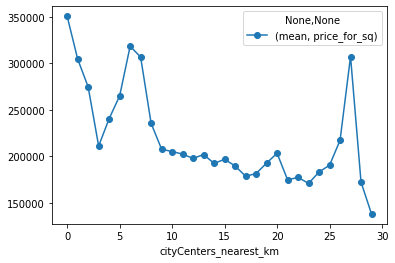

In [46]:
# 

print(data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest_km', values = 'price_for_sq', aggfunc = ['mean']))
print(data['cityCenters_nearest_km'].corr(data['price_for_sq']))
data_pivot_2 = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest_km', values = 'price_for_sq', aggfunc = ['mean'])
data_pivot_2.plot(style='o-');

## Общий вывод

В данном проекте был проведен исследовательский аналих данных  сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. В ходе исследования было обнаружено, что в данных присутствуют аномалии в стобцах "ceiling_height" и в столбце "locality_name". Также были преобразованы типы данных в столбцах на соответствующий. Были построены гистрограммы для практически всех параметров и определно в какой числовом диапазоне параметра было наибольшее количество объявлений. Была определена медианное и среднее количество дней размещения объявления и на основе гистрограммы и значений было определено быстрое (до 95 дней) и аномально медленное (свыше 300 дней). Также было определено, что больше всего на стоимость объекта недвижимости влияет общая площадь и количество комнат. Был определен город с наибольшей стоимостью за квадратный метр (Санкт-Петербург - 199452 рубл.) и с наименьшей стоимостью (Выборг - 80605 рубл.). По коэффициенту корреляции было определено, что большой зависимости стоимости одно квадратного метра и расстояния от центра нет.